
> **Pertemuan ke-4 ScikitLearn (PCA, LDA dan SVD)**





Nama : Dhian

Nim : H071201073

**PCA dengan Iris Dataset**

In [1]:
#Input Library yang digunakan
import numpy as np
import matplotlib.pyplot as plt

from sklearn import decomposition
from sklearn import datasets

In [2]:
np.random.seed(5)

In [46]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [4]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()

<Figure size 288x216 with 0 Axes>

In [5]:
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

In [6]:
for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )

In [7]:
#Susun ulang label agar memiliki warna yang cocok dengan hasil cluster
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

**LDA**

Perbandingan proyeksi 2D LDA dan PCA dari dataset Iris

In [8]:
!pip install LDA
#Untuk pemodelan topik
!pip3 install gensim
#Untuk memvisualisasikan model topik
!pip3 install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 351 kB 7.4 MB/s 
     |████████████████████████████████| 99 kB 10.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 6.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=05620ba53b87248d77db5942527cf7e641edbdfbb2ab80e1347e665549e86dfa
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=e9a91d3

In [9]:
print(__doc__)

Automatically created module for IPython interactive environment


In [11]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [12]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LDA(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

In [13]:
#Persentase varians dijelaskan untuk setiap komponen
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.92461872 0.05306648]


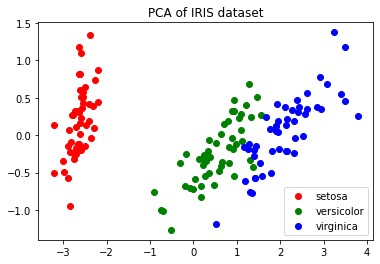

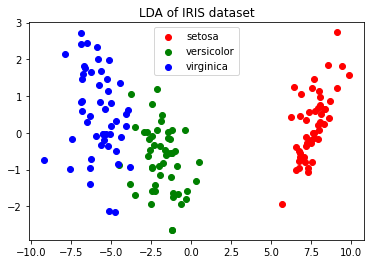

In [14]:
plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA of IRIS dataset')

plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('LDA of IRIS dataset')

plt.show()

**SVD**

Mengelompokkan dokumen teks menggunakan k-means

In [15]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups

In [16]:
categories = [
    "alt.atheism",
    "talk.religion.misc",
    "comp.graphics",
    "sci.space",
]

dataset = fetch_20newsgroups(
    remove=("headers", "footers", "quotes"),
    subset="all",
    categories=categories,
    shuffle=True,
    random_state=42,
)

labels = dataset.target
unique_labels, category_sizes = np.unique(labels, return_counts=True)
true_k = unique_labels.shape[0]

print(f"{len(dataset.data)} documents - {true_k} categories")

3387 documents - 4 categories


mengukur kualitas hasil pengelompokan

In [17]:
from collections import defaultdict
from sklearn import metrics
from time import time

In [18]:
evaluations = []
evaluations_std = []

In [19]:
def fit_and_evaluate(km, X, name=None, n_runs=5):
    name = km.__class__.__name__ if name is None else name

    train_times = []
    scores = defaultdict(list)
    for seed in range(n_runs):
        km.set_params(random_state=seed)
        t0 = time()
        km.fit(X)
        train_times.append(time() - t0)
        scores["Homogeneity"].append(metrics.homogeneity_score(labels, km.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels, km.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)

K-means clustering pada fitur teks

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=5,
    stop_words="english",
)
t0 = time()
X_tfidf = vectorizer.fit_transform(dataset.data)

print(f"vectorization done in {time() - t0:.3f} s")
print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")

vectorization done in 0.527 s
n_samples: 3387, n_features: 7929


In [22]:
print(f"{X_tfidf.nnz / np.prod(X_tfidf.shape):.3f}")

0.007


Mengelompokkan data sparse dengan k-means

In [23]:
from sklearn.cluster import KMeans

In [24]:
for seed in range(5):
    kmeans = KMeans(
        n_clusters=true_k,
        max_iter=100,
        n_init=1,
        random_state=seed,
    ).fit(X_tfidf)
    cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
    print(f"Number of elements asigned to each cluster: {cluster_sizes}")
print()
print(
    "True number of documents in each category according to the class labels: "
    f"{category_sizes}"
)

Number of elements asigned to each cluster: [   1    1 3384    1]
Number of elements asigned to each cluster: [1688  725  238  736]
Number of elements asigned to each cluster: [2004  446  646  291]
Number of elements asigned to each cluster: [1695  649  446  597]
Number of elements asigned to each cluster: [ 338 2155  417  477]

True number of documents in each category according to the class labels: [799 973 987 628]


In [25]:
means = KMeans(
    n_clusters=true_k,
    max_iter=100,
    n_init=5,
)

fit_and_evaluate(kmeans, X_tfidf, name="KMeans\non tf-idf vectors")

clustering done in 0.07 ± 0.03 s 
Homogeneity: 0.243 ± 0.124
Completeness: 0.319 ± 0.089
V-measure: 0.264 ± 0.133
Adjusted Rand-Index: 0.155 ± 0.087
Silhouette Coefficient: 0.006 ± 0.004


Melakukan pengurangan dimensi menggunakan LSA

In [26]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [27]:
lsa = make_pipeline(TruncatedSVD(n_components=100), Normalizer(copy=False))
t0 = time()
X_lsa = lsa.fit_transform(X_tfidf)
explained_variance = lsa[0].explained_variance_ratio_.sum()

print(f"LSA done in {time() - t0:.3f} s")
print(f"Explained variance of the SVD step: {explained_variance * 100:.1f}%")

LSA done in 0.754 s
Explained variance of the SVD step: 18.4%


In [28]:
kmeans = KMeans(
    n_clusters=true_k,
    max_iter=100,
    n_init=1,
)

fit_and_evaluate(kmeans, X_lsa, name="KMeans\nwith LSA on tf-idf vectors")

clustering done in 0.08 ± 0.03 s 
Homogeneity: 0.391 ± 0.018
Completeness: 0.427 ± 0.027
V-measure: 0.408 ± 0.022
Adjusted Rand-Index: 0.315 ± 0.017
Silhouette Coefficient: 0.030 ± 0.001


In [47]:
from sklearn.cluster import MiniBatchKMeans

In [30]:
minibatch_kmeans = MiniBatchKMeans(
    n_clusters=true_k,
    n_init=1,
    init_size=1000,
    batch_size=1000,
)

fit_and_evaluate(
    minibatch_kmeans,
    X_lsa,
    name="MiniBatchKMeans\nwith LSA on tf-idf vectors",
)

clustering done in 0.25 ± 0.14 s 
Homogeneity: 0.312 ± 0.146
Completeness: 0.359 ± 0.074
V-measure: 0.321 ± 0.139
Adjusted Rand-Index: 0.278 ± 0.143
Silhouette Coefficient: 0.023 ± 0.015


Istilah teratas per cluster

In [31]:
original_space_centroids = lsa[0].inverse_transform(kmeans.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(true_k):
    print(f"Cluster {i}: ", end="")
    for ind in order_centroids[i, :10]:
        print(f"{terms[ind]} ", end="")
    print()

Cluster 0: graphics software computer comp image information 3d pc available video 
Cluster 1: god people don think just say religion believe know jesus 
Cluster 2: thanks know does files edu file like ve program image 
Cluster 3: space launch orbit like earth nasa shuttle moon just time 


HashingVektorizer

In [49]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [48]:
lsa_vectorizer = make_pipeline(
    HashingVectorizer(stop_words="english", n_features=50_000),
    TfidfTransformer(),
    TruncatedSVD(n_components=100, random_state=0),
    Normalizer(copy=False),
)

t0 = time()
X_hashed_lsa = lsa_vectorizer.fit_transform(dataset.data)
print(f"vectorization done in {time() - t0:.3f} s")

vectorization done in 4.016 s


In [50]:
fit_and_evaluate(kmeans, X_hashed_lsa, name="KMeans\nwith LSA on hashed vectors")

clustering done in 0.30 ± 0.32 s 
Homogeneity: 0.400 ± 0.003
Completeness: 0.451 ± 0.005
V-measure: 0.424 ± 0.004
Adjusted Rand-Index: 0.320 ± 0.010
Silhouette Coefficient: 0.029 ± 0.000


In [45]:
kmeans = KMeans(
    n_clusters=true_k,
    max_iter=100,
    n_init=1,
)

fit_and_evaluate(kmeans, X_lsa, name="KMeans\nwith LSA on tf-idf vectors")

clustering done in 0.24 ± 0.18 s 
Homogeneity: 0.391 ± 0.018
Completeness: 0.427 ± 0.027
V-measure: 0.408 ± 0.022
Adjusted Rand-Index: 0.315 ± 0.017
Silhouette Coefficient: 0.029 ± 0.001


In [36]:
from sklearn.cluster import MiniBatchKMeans

In [37]:
minibatch_kmeans = MiniBatchKMeans(
    n_clusters=true_k,
    n_init=1,
    init_size=1000,
    batch_size=1000,
)

fit_and_evaluate(
    minibatch_kmeans,
    X_lsa,
    name="MiniBatchKMeans\nwith LSA on tf-idf vectors",
)

clustering done in 0.12 ± 0.04 s 
Homogeneity: 0.312 ± 0.146
Completeness: 0.359 ± 0.074
V-measure: 0.321 ± 0.139
Adjusted Rand-Index: 0.278 ± 0.143
Silhouette Coefficient: 0.022 ± 0.014


In [38]:
original_space_centroids = lsa[0].inverse_transform(kmeans.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(true_k):
    print(f"Cluster {i}: ", end="")
    for ind in order_centroids[i, :10]:
        print(f"{terms[ind]} ", end="")
    print()

Cluster 0: god think people just don know space does like right 
Cluster 1: god people said believe don jesus say bible does ico 
Cluster 2: graphics thanks image software know files format file like ftp 
Cluster 3: space nasa just shuttle orbit launch think moon time like 


HashingVektorizerr

In [39]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [40]:
lsa_vectorizer = make_pipeline(
    HashingVectorizer(stop_words="english", n_features=50_000),
    TfidfTransformer(),
    TruncatedSVD(n_components=100, random_state=0),
    Normalizer(copy=False),
)

t0 = time()
X_hashed_lsa = lsa_vectorizer.fit_transform(dataset.data)
print(f"vectorization done in {time() - t0:.3f} s")

vectorization done in 3.853 s


In [51]:
fit_and_evaluate(kmeans, X_hashed_lsa, name="KMeans\nwith LSA on hashed vectors")

clustering done in 0.30 ± 0.14 s 
Homogeneity: 0.400 ± 0.003
Completeness: 0.451 ± 0.005
V-measure: 0.424 ± 0.004
Adjusted Rand-Index: 0.320 ± 0.010
Silhouette Coefficient: 0.029 ± 0.001


In [52]:
fit_and_evaluate(
    minibatch_kmeans,
    X_hashed_lsa,
    name="MiniBatchKMeans\nwith LSA on hashed vectors",
)

clustering done in 0.07 ± 0.04 s 
Homogeneity: 0.349 ± 0.059
Completeness: 0.364 ± 0.060
V-measure: 0.357 ± 0.059
Adjusted Rand-Index: 0.317 ± 0.072
Silhouette Coefficient: 0.026 ± 0.004


Ringkasan evaluasi pengelompokan

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

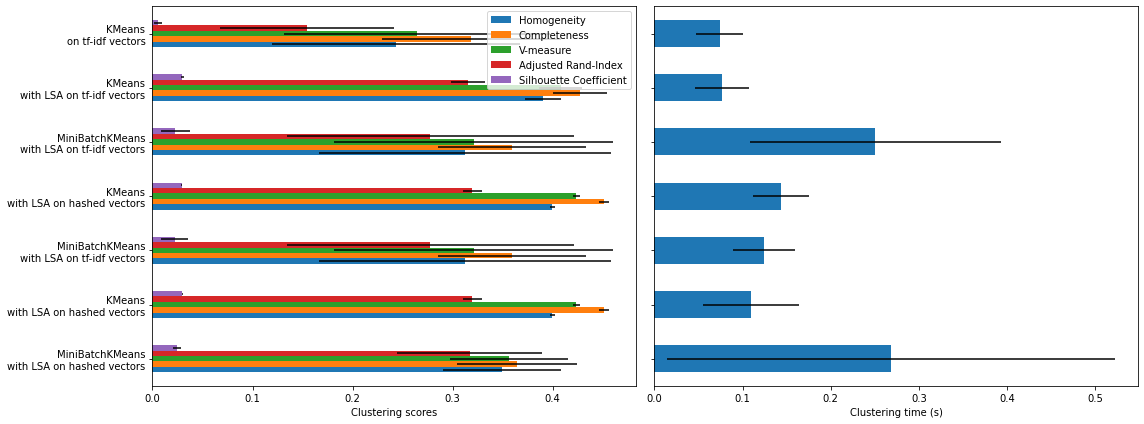

In [44]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)

df = pd.DataFrame(evaluations[::-1]).set_index("estimator")
df_std = pd.DataFrame(evaluations_std[::-1]).set_index("estimator")

df.drop(
    ["train_time"],
    axis="columns",
).plot.barh(ax=ax0, xerr=df_std)
ax0.set_xlabel("Clustering scores")
ax0.set_ylabel("")

df["train_time"].plot.barh(ax=ax1, xerr=df_std["train_time"])
ax1.set_xlabel("Clustering time (s)")
plt.tight_layout()